##### Processo de Importação de Bibliotecas Necessárias #####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
from datetime import datetime

#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()


##### Processo de Instalação do Pandas DataReader #####

In [2]:
# Instalação do Pandas DataReader
# pip install pandas_datareader

##### Processo de Definição de Variáveis #####

In [3]:
# Diretorio que contém informações da carteira de ativos
diretorioArquivoEmpresasMoedas  = 'C:\\Temp\\Python\\Ativos\\ativos.xlsx'
# Diretório onde será salvo o arquivo 
diretorioArquivoAtivo = 'C:\\Temp\\Python\\AcompanhamentoAtivo'
# Extensão do Arquivo
extensao  = 'csv'
# Período Inicial
dataInicio = '2022-12-01'
# Período Final
data_e_hora_atuais = datetime.now()
dataFim = data_e_hora_atuais.strftime('%Y-%m-%d')

##### Processo de Importação da Carteira de Ativos #####

In [4]:
nomeArquivo = pd.read_excel(diretorioArquivoEmpresasMoedas,header=0)
nomeArquivo.sort_index(ascending=False,inplace=True)
nomeArquivo

,Ativo
0,AMER3.SA


##### Processo de Busca no Yahoo Finances das Informações de Nossa Carteira #####

In [5]:
df = pd.DataFrame()

for ativo in list(nomeArquivo['Ativo']):
    # Nome do ativo
    nomeAtivo = ativo
    # Captura das Informações do Yahoo e informação de periodo inicial e final
    dfYF = web.get_data_yahoo(f'{nomeAtivo}', start=f'{dataInicio}', end=f'{dataFim}')
    # Inclusão de Colunas Data da Extração e Ativo
    dfYF = dfYF.assign(DataExtracao=data_e_hora_atuais.strftime('%Y-%m-%d %H:%M:%S.%f'),AcaoMoeda=nomeAtivo)
    df = df.append(dfYF)
    # Comando para salvar o arquivo
    df.to_csv(diretorioArquivoAtivo+'\\'+nomeAtivo+'.'+extensao)

[*********************100%***********************]  1 of 1 completed


C:\Users\lacer\AppData\Local\Temp\ipykernel_19724\3372698632.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfYF)


In [9]:


arquivo = diretorioArquivoAtivo+'\\'+nomeAtivo+'.'+extensao
df2 = pd.read_csv(arquivo)



,Date,Open,High,Low,Close,Adj Close,Volume,DataExtracao,AcaoMoeda
0,2022-12-01 00:00:00-03:00,10.46,10.48,9.81,9.83,9.83,28640100,2023-01-22 00:38:22.094253,AMER3.SA
1,2022-12-02 00:00:00-03:00,9.85,10.23,9.56,9.67,9.67,35667500,2023-01-22 00:38:22.094253,AMER3.SA
2,2022-12-05 00:00:00-03:00,9.62,9.66,8.91,9.00,9.00,38838300,2023-01-22 00:38:22.094253,AMER3.SA
3,2022-12-06 00:00:00-03:00,9.15,9.46,8.95,9.07,9.07,39029600,2023-01-22 00:38:22.094253,AMER3.SA
4,2022-12-07 00:00:00-03:00,9.00,9.33,8.94,8.98,8.98,32068800,2023-01-22 00:38:22.094253,AMER3.SA
5,2022-12-08 00:00:00-03:00,9.00,9.09,8.51,8.60,8.60,43605600,2023-01-22 00:38:22.094253,AMER3.SA
6,2022-12-09 00:00:00-03:00,8.77,8.79,8.30,8.37,8.37,24796100,2023-01-22 00:38:22.094253,AMER3.SA
7,2022-12-12 00:00:00-03:00,8.21,8.59,8.08,8.45,8.45,27163400,2023-01-22 00:38:22.094253,AMER3.SA
8,2022-12-13 00:00:00-03:00,8.52,8.92,8.30,8.38,8.38,38861000,2023-01-22 00:38:22.094253,AMER3.SA
9,2022-12-14 00:00:00-03:00,8.28,8.29,7.75,8.14,8.14,39543200,2023-01-22 00:38:22.094253,AMER3.SA


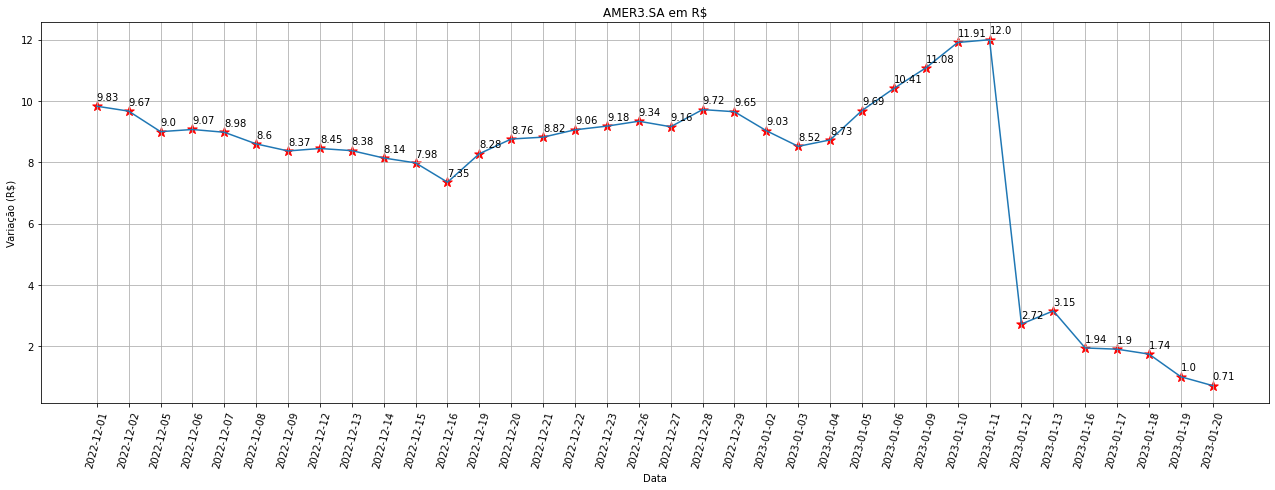

In [7]:
plt.title('AMER3.SA em R$')
plt.xlabel("Data") 
plt.ylabel("Variação (R$)")
df2['Close'].plot(figsize = (22, 7))
plt.rcParams["figure.autolayout"] = True
x = df2['Date'].str[:10]
y = df2['Close']
plt.scatter(x, y, label = "Rendimento", color = "r", marker = "*", s = 100)
for i in range(len(x)):
    plt.annotate(round(y[i],2), (x[i], y[i]+0.2))
plt.xticks(rotation=75)
plt.grid()
plt.show()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

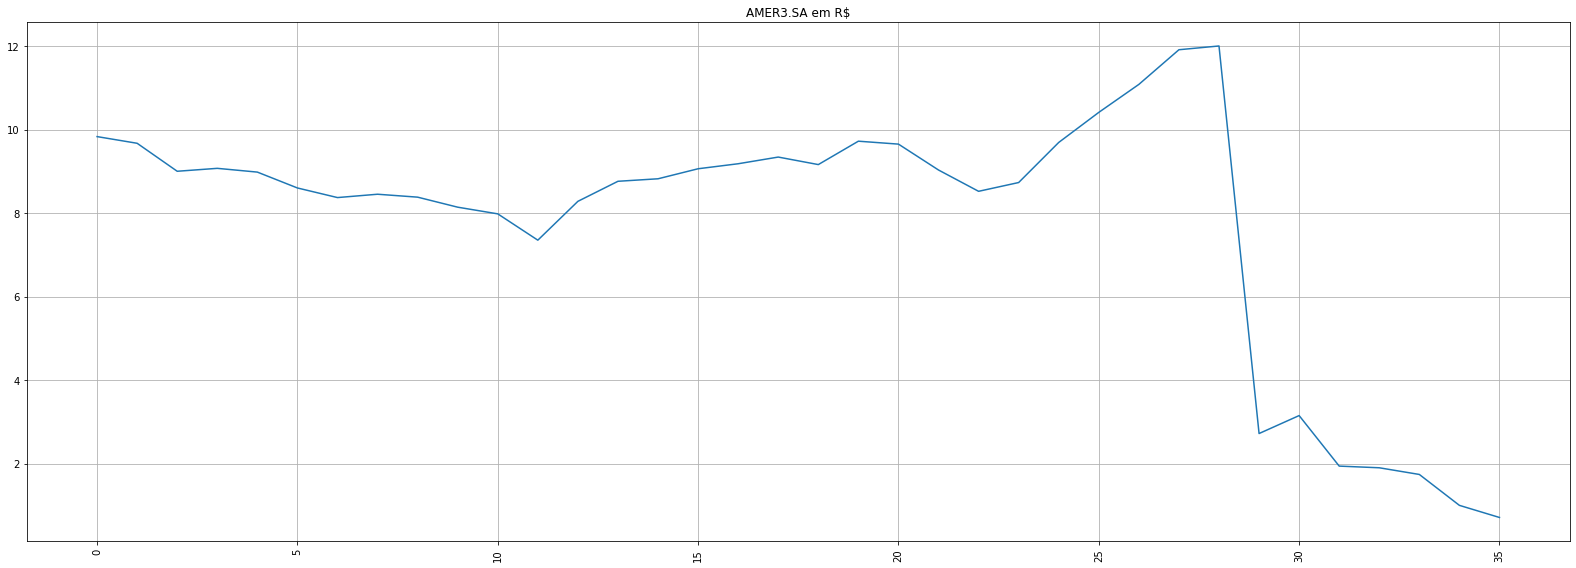

In [8]:
df2['Close'].plot(figsize = (22, 8))
plt.title('AMER3.SA em R$')
plt.grid()
plt.xticks(rotation=90)